In [ ]:
ls /kaggle/input/bigmart-sales-data/

## <div style="background-color: #3B9AE1; color: white; height: 60px; font-size: 35px; padding: 10px" align="center">Importing the Relevant Libraries</div>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
%time train = pd.read_csv('/kaggle/input/bigmart-sales-data/Train.csv')
%time test = pd.read_csv('/kaggle/input/bigmart-sales-data/Test.csv')

In [ ]:
train.head()

In [ ]:
test.head()

## <div style="background-color: #3B9AE1; color: white; height: 60px; font-size: 35px; padding: 10px" align="center">Data Inspection</div>

In [ ]:
train.shape,test.shape

We have 8523 rows and 12 columns in Train set whereas Test set has 5681 rows and 11 columns. Columns of Train set have dependent and independent variables where Test set have only independent variables 

In [ ]:
train.isnull().apply(lambda x: (x.sum(), x.sum()/train.shape[0] *100)).transpose()

**We have 17.16 % and 28.27 % of missing values in Item weight and Outlet_Size columns respectively in Train Datasets.**

In [ ]:
test.isnull().apply(lambda x: (x.sum(), x.sum()/test.shape[0] *100)).transpose()

**We have 17% and 28% of missing values in Item weight and Outlet_Size columns in Test Dataset, i.e. around same of Train dataset**

In [ ]:
train.dtypes

In [ ]:
test.dtypes

## <div style="background-color: #3B9AE1; color: white; height: 60px; font-size: 35px; padding: 10px" align="center">Data Cleaning</div>

1. Missing Value Handling : Missing data in the training data set can make the model biased.
2. Fix irregularities in Columns

## 1. Item Weight

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Item_Weight',data=train)
plt.show()

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Item_Weight',data=test)
plt.show()

**The Box Plots above clearly show no "Outliers" and hence we can impute the missing values with "Mean"**

In [ ]:
train['Item_Weight']= train['Item_Weight'].fillna(train['Item_Weight'].mean())
test['Item_Weight']= test['Item_Weight'].fillna(test['Item_Weight'].mean())

In [ ]:
train['Item_Weight'].isnull().sum(),test['Item_Weight'].isnull().sum()

**We have succesfully imputed the missing values from the column Item_Weight.**

## 2. Outlet Size

In [ ]:
train['Outlet_Size'].isnull().sum(),test['Outlet_Size'].isnull().sum()

In [ ]:
train['Outlet_Size'].value_counts()

In [ ]:
test['Outlet_Size'].value_counts()

**Since the outlet_size is a categorical column, we can impute the missing values by "Mode"(Most Repeated Value) from the column.**

In [ ]:
train['Outlet_Size']= train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0])
test['Outlet_Size']= test['Outlet_Size'].fillna(test['Outlet_Size'].mode()[0])

In [ ]:
train['Outlet_Size'].isnull().sum(),test['Outlet_Size'].isnull().sum()

**We have succesfully imputed the missing values from the column Outlet_Size.**

## 3. Item Fat Content

In [ ]:
train.Item_Fat_Content.value_counts()

In [ ]:
test.Item_Fat_Content.value_counts()

**We see there are some irregularities in the column and it is needed to fix them!**

In [ ]:
train['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True)
test['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True)

In [ ]:
train.Item_Fat_Content.value_counts()

In [ ]:
test.Item_Fat_Content.value_counts()

## <div style="background-color: #3B9AE1; color: white; height: 60px; font-size: 35px; padding: 10px" align="center">Exploratory Data Analysis</div>


* Analysis on Categorical Features
* Analysis on Numerical Features

## @ **Analysis on Categorical Features**

In [ ]:
categorical = train.select_dtypes(include =[object])
print(categorical.shape[1],"Categorical Features in Train Set are :")
print('\t'+'\n\t'.join(categorical.columns)+"\n")

**Item_Identifier and Outlet_Identifier are just id, don't have any relation with Sales**

## 1. Item Fat Content

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(data=train, x="Item_Fat_Content", palette='spring')
plt.show()

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x='Item_Fat_Content', y='Item_Outlet_Sales',data=train,palette='mako')
plt.show()

## Observations:
* The Items bought are more of Low Fat.
* But Item Outles sales are almost same for both Low Fat and Regular Item Content

## 2. Item Type

In [ ]:
plt.figure(figsize=(25,7))
sns.countplot(x='Item_Type',data=train, palette='turbo')
plt.show()

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(y='Item_Type',x='Item_Outlet_Sales',data=train,palette='flag')
plt.show()

### Observations :

* The products available were Fruits-Veggies and Snack Foods but the sales of Seafood and Starchy Foods seems higher and hence the sales can be improved with having stock of products that are most bought by customers

## 3. Outlet Size

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x='Outlet_Size',data=train,palette='winter')
plt.show()

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x='Outlet_Size',y='Item_Outlet_Sales',data=train,palette='winter')
plt.show()

## Observations:
* The Outlets are more of Medium Size
* But Outlet Sales is maximum for Medium and High sized Outlets so may be with High size Outlets can improve the Outlet Sales.

## 4. Outlet Location Type

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x='Outlet_Location_Type',data=train,palette='summer')
plt.show()

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',data=train,palette='plasma')
plt.show()

## Observations:

* The Outlet Sales tend to be high for Tier3 and Tier 2 location types 
* But we have only Tier3 locations maximum Outlets

## 5. Outlet Type

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x='Outlet_Type',data=train,palette='autumn')
plt.show()

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x='Outlet_Type',y='Item_Outlet_Sales',data=train,palette='plasma')
plt.show()

## Observations:
* The Outlets are more of Supermarket Type1.
* But sales are more on Type 3

In [ ]:
plt.figure(figsize=(25,5))
sns.barplot(x='Item_Type',y='Item_Outlet_Sales',hue='Item_Fat_Content',data=train,palette='mako')
plt.show()

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x='Outlet_Location_Type', y='Item_Outlet_Sales',hue='Outlet_Type',data=train,palette='magma')
plt.show()

### Observations:

*    The Tier-3 location type has all types of Outlet type and has high sales margin.



## @ Analysis on Numerical Features

In [ ]:
numerical= train.select_dtypes(include =[float,int])
print(numerical.shape[1],"Numerical Features in Train Set :")
print('\t'+'\n\t'.join(numerical.columns)+"\n")

## 1. Item Weight

In [ ]:
sns.displot(x=train.Item_Weight, color='purple', kde=True)

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Item_Weight',y='Item_Outlet_Sales',data=train)
plt.show()

### Observations:

* We have more products of weight around 12.5, and sell is maximum for that weight

## 2. Item Visibility

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Item_Visibility',y='Item_Outlet_Sales',data=train)
plt.show()

In [ ]:
train.Item_Visibility.min()

**Item_Visibility has a minimum value of zero. This makes no practical sense because when a product is being sold in a store, the visibility cannot be 0.**

In [ ]:
sns.boxplot(x="Item_Visibility", data=train)
plt.show()

In [ ]:
train['Item_Visibility'].mean()

In [ ]:
train['Item_Visibility'].mode()

In [ ]:
train['Item_Visibility'].median()


**Lets consider it like missing information and impute it with median (as their are outlier) visibility of that product**

In [ ]:
train['Item_Visibility']=train['Item_Visibility'].replace(0,train['Item_Visibility'].median())
test['Item_Visibility']=test['Item_Visibility'].replace(0,test['Item_Visibility'].median())

In [ ]:
sns.scatterplot(x='Item_Visibility',y='Item_Outlet_Sales',data=train)
plt.show()

In [ ]:
train.Item_Visibility.min()

**We can see that now visibility is not exactly zero and it has some value indicating that Item is rarely purchased by the customers**

In [ ]:
sns.displot(x=train.Item_Visibility, color='purple', kde=True)
plt.show()

### Observation:

* We have Items having Visibility 0 to 0.2 is more.
* And Items having Visibility around 0.05 is maximum.
* Sales is more for Items having Visibility 0 to 0.2
* Positive skewness

**<center>Remove Skewness</center>**



Skewness in variables is undesirable for predictive modeling. Some machine learning methods assume normally distributed data and a skewed variable can be transformed by taking its log, square root, or cube root so as to make its distribution as close to normal distribution as possible. 

In [ ]:
sns.displot(x=np.log(train.Item_Visibility), color='purple', kde=True)
plt.show()

In [ ]:
sns.displot(x=np.sqrt(train.Item_Visibility), color='purple', kde=True)
plt.show()

In [ ]:
sns.displot(x=np.cbrt(train.Item_Visibility), color='purple', kde=True)
plt.show()

In [ ]:
train['Item_Visibility'] = np.cbrt(train['Item_Visibility'])

## 3. Item MRP 

In [ ]:
sns.displot(x=train.Item_MRP, color='purple', kde=True)
plt.show()

In [ ]:
sns.scatterplot(x='Item_MRP',y='Item_Outlet_Sales',data=train)
plt.show()

### Observations:

   * We have good amount of products for 50 MRP, 100 MRP ,180 MRP
   * But MRP ranging from 200-250 dollars is having high Sales.

## 4. Outlet Establishment Year

In [ ]:
train['Years_Established'] = train['Outlet_Establishment_Year'].apply(lambda x: 2022 - x) 
test['Years_Established'] = test['Outlet_Establishment_Year'].apply(lambda x: 2022 - x)

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x='Years_Established',data=train,palette='mako_r')
plt.show()

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x='Years_Established',y='Item_Outlet_Sales',data=train,palette='viridis')

## Observations:
 *    It is quiet evident that Outlets established 35 years before is having good Sales margin.
 * We also have a outlet which was established before 22 years has the lowest sales margin, so established years wouldn't improve the Sales unless the products are sold according to customer's interest.



## <div style="background-color: #3B9AE1; color: white; height: 60px; font-size: 35px; padding: 10px" align="center">Corraltion Matrix</div>

In [ ]:
# plt.figure(figsize=(12,12))
sns.heatmap(train.corr() ,cmap='GnBu', annot=True)
plt.show()

We can see Item_Outlet_Sales is highly correlated with Item_MRP, i.e. if Item_MRP increases, Item_Outlet_Sales increases.

## <div style="background-color: #3B9AE1; color: white; height: 60px; font-size: 35px; padding: 10px" align="center">Feature Engineering</div>

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

for i in categorical.columns:
    train[i] = le.fit_transform(train[i])
    
for i in categorical.columns:
    test[i] = le.fit_transform(test[i])

In [ ]:
train.head()

**<center>There are some columns that needs to be dropped as they don't seem helping our analysis</center>**

In [ ]:
train.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'],axis=1, inplace=True)
test.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'],axis=1, inplace=True)

In [ ]:
train.head()

## <div style="background-color: #3B9AE1; color: white; height: 60px; font-size: 35px; padding: 10px" align="center">How we do Predictions ?</div>

We basically estimate the relationships between dependent & independent variables. After that we predict value of Dependent variable.

## * Dependent and Independent Variables

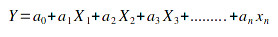

Here Y is dependent variable and X₁,X₂,X₃ …….,Xn are independent variable. Dependent variable is also called Outcome Variable, Response Variable and Independent Variable is also called Predictor Variable, Explanatory Variable.

### * **In this problem Independent variables are:**

* Item_Identifier
* Item_Weight
* Item_Fat_Content
* Item_Visibility
* Item_Type
* Item_MRP
* Outlet_Identifier
* Outlet_Establishment_Year
* Outlet_Size
* Outlet_Location_Type
* Outlet_Type

### * **Dependent Variable:**

* Item_Outlet_Sales

We have to predict value of **Item_Outlet_Sales**

In [ ]:
X = train.drop(columns=["Item_Outlet_Sales"])        # Independent Variables
y = train.Item_Outlet_Sales                          # Dependent Variables

## <div style="background-color: #3B9AE1; color: white; height: 60px; font-size: 35px; padding: 10px" align="center">Feature Scaling</div>

Scaling the features makes the flow of gradient descent smooth and helps algorithms quickly reach the minima of the cost function. Without scaling features, the algorithm may be biased toward the feature which has values higher in magnitude.

Feature scaling is important for every algorithm where distance matter. Two famous techniques for Feature Scaling are:

1. Normalization
2. Standardization

### Normalization
In this approach we scale down the features between 0 and 1.


<div style="width:300px">
    
    
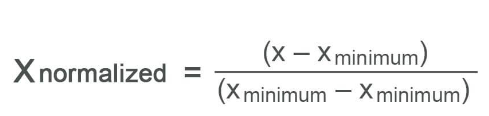

    
    
</div>



### Standardization (Z-Score Normalization)
Here we scale down the features in such a way that it will have the properties of standard normal distribution with mean 0 standard deviation 1.

<div style="width:150px">
    
    
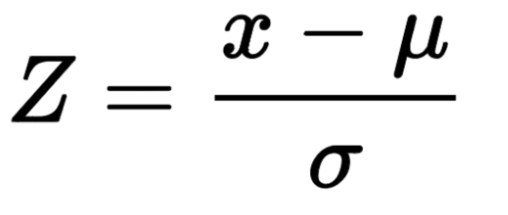

    
</div>

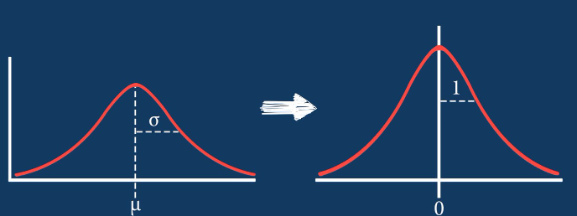


**Standardization is useful when the feature distribution is Normal or Gaussian, otherwise we do Normalization.**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

## 1. Item Weight

In [ ]:
standard_Item_Weight = StandardScaler()
standard_Item_Weight.fit(X[['Item_Weight']])

X['Item_Weight'] =  standard_Item_Weight.transform(X[['Item_Weight']])
sns.displot(X.Item_Weight, kde=True)
plt.show()

In [ ]:
standard_Item_Weight.mean_

In [ ]:
test['Item_Weight'] = standard_Item_Weight.transform(test[['Item_Weight']])

## 2. Item Visibility

In [ ]:
standard_Item_Visibility = StandardScaler()
X['Item_Visibility'] = standard_Item_Visibility.fit_transform(X[['Item_Visibility']])
sns.displot(X.Item_Visibility, kde=True)
plt.show()

In [ ]:
standard_Item_Visibility.mean_

In [ ]:
test['Item_Visibility'] = standard_Item_Visibility.transform(test[['Item_Visibility']])

## 3. Item MRP

In [ ]:
normal_Item_MRP = MinMaxScaler()
X['Item_MRP'] = normal_Item_MRP.fit_transform(X[['Item_MRP']])
sns.displot(X.Item_MRP, kde=True)
plt.show()

In [ ]:
test['Item_MRP'] = normal_Item_MRP.transform(test[['Item_MRP']])

In [ ]:
X.head()

In [ ]:
test.head()

## <div style="background-color: #3B9AE1; color: white; height: 60px; font-size: 35px; padding: 10px" align="center">Model Training</div>

## What is Cross Validation Score ?

Cros Validation score is R2 score for every fold of a n fold cross validation.

<div style="width:300px">
     
     
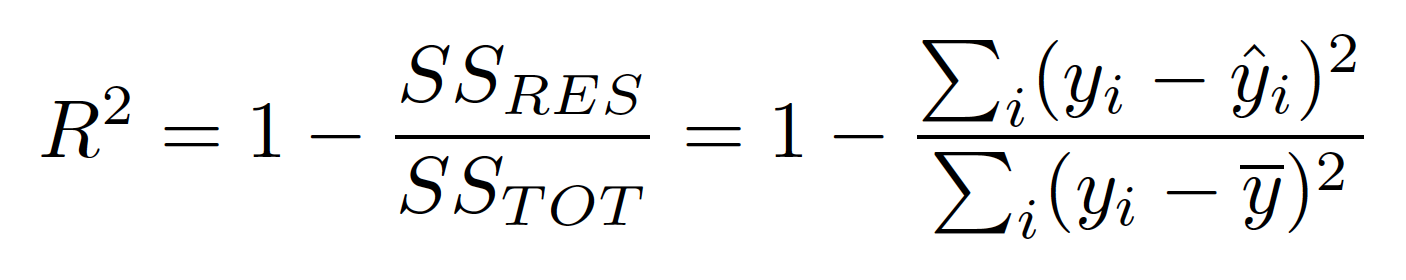

    
</div>

The (R-squared) , (also called the coefficient of determination), which is the proportion of variance (%) in the dependent variable that can be explained by the independent variable. Hence, as a rule of thumb for interpreting the strength of a relationship based on its R-squared value (use the absolute value of the R-squared value to make all values positive):
- if  R-squared value < 0.3 this value is generally considered a None or Very weak effect size,
- if R-squared value 0.3 < r < 0.5 this value is generally considered a weak or low effect size,
- if R-squared value 0.5 < r < 0.7 this value is generally considered a Moderate effect size,
- if R-squared value r > 0.7 this value is generally considered strong effect size,


Ref: Source: Moore, D. S., Notz, W. I, & Flinger, M. A. (2013). The basic practice of statistics (6th ed.). New York, NY: W. H. Freeman and Company. Page (138).


In [ ]:
def score(model, X=X, y=y):
    print("Average R2 Score :", np.average(cross_val_score(model, X, y, cv=10)))
    print("Average Root Mean Square Error :", np.average(cross_val_score(model, X, y, cv=10, scoring='neg_root_mean_squared_error')))

# Learning Curve

A learning curve shows the relationship of the training score versus the cross validated test score for an estimator with a varying number of training samples. This visualization is typically used to show two things:

* How much the estimator benefits from more data (e.g. do we have “enough data” or will the estimator get better if used in an online fashion).

* If the estimator is more sensitive to error due to variance vs. error due to bias.

In [ ]:
from yellowbrick.model_selection import LearningCurve

def learning_curve(model, X=X, y=y):
    visualizer = LearningCurve(model, scoring='r2')
    visualizer.fit(X, y)       
    visualizer.show()
    plt.show()

# Prediction Error

A prediction error plot shows the actual targets from the dataset against the predicted values generated by our model. This allows us to see how much variance is in the model. Data scientists can diagnose regression models using this plot by comparing against the 45 degree line, where the prediction exactly matches the model.

In [ ]:
from yellowbrick.regressor import prediction_error

# Residuals Plot

Residuals, in the context of regression models, are the difference between the observed value of the target variable (y) and the predicted value (ŷ), i.e. the error of the prediction. 

The residuals plot shows the difference between residuals on the vertical axis and the dependent variable on the horizontal axis, allowing you to detect regions within the target that may be susceptible to more or less error.

In [ ]:
from yellowbrick.regressor import ResidualsPlot

def residuals_plot(model, X_train, y_train, X_test, y_test):
    visualizer = ResidualsPlot(model)
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    visualizer.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 1. Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

LR = LinearRegression(positive=True)
LR.fit(X,y)

score(LR)

In [ ]:
learning_curve(LR, X, y)

In [ ]:
visualizer = prediction_error(LR, X_train, y_train, X_test, y_test)

In [ ]:
residuals_plot(LR, X_train, y_train, X_test, y_test)

## 2. Polynomial Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

poly = PolynomialFeatures(3)
X_poly = poly.fit_transform(X)

PR = LinearRegression(positive=True)
PR.fit(X_poly, y)

score(PR, X_poly, y)

In [ ]:
learning_curve(PR, X_poly, y)

In [ ]:
from yellowbrick.regressor import prediction_error

X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.3, random_state=42)

visualizer = prediction_error(PR, X_train_poly, y_train_poly, X_test_poly, y_test_poly)

In [ ]:
residuals_plot(PR, X_train_poly, y_train_poly, X_test_poly, y_test_poly)

In [ ]:
poly_2 = PolynomialFeatures(2)
X_poly_2 = poly_2.fit_transform(X)

PR_2 = LinearRegression(positive=True)
PR_2.fit(X_poly_2, y)

score(PR_2, X_poly_2, y)

In [ ]:
learning_curve(PR_2, X_poly_2, y)

In [ ]:
X_train_poly_2, X_test_poly_2, y_train_poly_2, y_test_poly_2 = train_test_split(X_poly_2, y, test_size=0.3, random_state=42)

visualizer = prediction_error(PR_2, X_train_poly_2, y_train_poly_2, X_test_poly_2, y_test_poly_2)

In [ ]:
residuals_plot(PR_2, X_train_poly_2, y_train_poly_2, X_test_poly_2, y_test_poly_2)

## 3. Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
from yellowbrick.regressor import ManualAlphaSelection

# Create a list of alphas to cross-validate against
alphas = np.logspace(1, .001, 50)

# Instantiate the visualizer
visualizer = ManualAlphaSelection(
    Ridge(),
    alphas=alphas,
    cv=12,
    scoring="r2"
)

visualizer.fit(X, y)
visualizer.show()

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

rg = Ridge(alpha=1.84, positive=True)
rg.fit(X,y)

score(rg)

In [ ]:
learning_curve(rg)

In [ ]:
prediction_error(rg, X_train, y_train, X_test, y_test)

In [ ]:
residuals_plot(rg, X_train, y_train, X_test, y_test)

## 4. Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso

alphas = np.logspace(0, 0.35, 50)

visualizer = ManualAlphaSelection(
    Lasso(positive=True),
    alphas=alphas,
    cv=12,
    scoring="r2"
)

visualizer.fit(X, y)
visualizer.show()

In [ ]:
from sklearn.metrics import mean_squared_error

ls = Lasso(alpha=1.58, positive=True)
ls.fit(X,y)

score(ls)

In [ ]:
learning_curve(ls)

In [ ]:
prediction_error(ls, X_train, y_train, X_test, y_test)

In [ ]:
residuals_plot(ls, X_train, y_train, X_test, y_test)

## 5. Random Forest Regressor

In [ ]:
from yellowbrick.model_selection import ValidationCurve
from sklearn.ensemble import RandomForestRegressor

viz = ValidationCurve(
    RandomForestRegressor(), param_name="max_depth",
    param_range=np.arange(1, 20), cv=5, scoring="r2"
)

viz.fit(X, y)
viz.show()


In [ ]:
viz = ValidationCurve(
    RandomForestRegressor(), param_name="max_depth",
    param_range=np.arange(1, 8), cv=5, scoring="r2"
)

viz.fit(X, y)
viz.show()

**We see that R2 score decreases after depth 5. So for the best Result we are taking max_depth=5**

In [ ]:
rfr = RandomForestRegressor(max_depth=5, random_state=5)
rfr.fit(X,y)

score(rfr)

In [ ]:
learning_curve(rfr)

In [ ]:
prediction_error(rfr, X_train, y_train, X_test, y_test)

In [ ]:
residuals_plot(rfr, X_train, y_train, X_test, y_test)

## Save Model

In [ ]:
import pickle as pk

In [ ]:
with open('rfr.pk', 'wb') as f:
    pk.dump(rfr, f)

In [ ]:
# standard_Item_Weight, standard_Item_Visibility, normal_Item_MRP

In [ ]:
with open('standard_Item_Weight.pk', 'wb') as f:
    pk.dump(standard_Item_Weight, f)

In [ ]:
with open('standard_Item_Visibility.pk', 'wb') as f:
    pk.dump(standard_Item_Visibility, f)

In [ ]:
with open('normal_Item_MRP.pk', 'wb') as f:
    pk.dump(normal_Item_MRP, f)